# Computer Vision Fundamentals

## Images contain signals, signals are waves, waves have frequency and phase

### An EXPO Exhibition by Kristy Wendt for the University of Wisconsin-Madison

Accreditation: This module was inspired by my experience in <a href= https://qiml.radiology.wisc.edu/teaching/> Introduction to the Mathematical Foundations of Imaging 573</a> at the University of Wisconsin-Madison taught by <a href=https://radiology.wisc.edu/profile/diego-hernando-706/>Diego Hernando</a> who runs the <a href= https://qiml.radiology.wisc.edu/>Quantitative Imaging Methods Lab</a> and my time at the Laboratory for Computational Imaging (LOCI) working for Kevin Eliceiri.  I used excerpts from +maths magazine, Medium, and http://www.xahlee.org/ to visually reinforce math concepts.

Today we are going to learn to think of an image as a signal. First things first, an image is just a matrix of numbers. Let's start with a picture of Abraham Lincoln from <a href=https://prathmeshm1008.medium.com/fundamentals-of-computer-vision-729e5c6a86bf/>an article in Medium by Pramath Muchhala</a>.  Each number here represents the intensity of a pixel, where the values range from 0 (darkest) to 255 (lightest). Each row of pixels is our signal.  Lincoln's dark hair has lower values, and his forehead has higher values all the way up to 255.

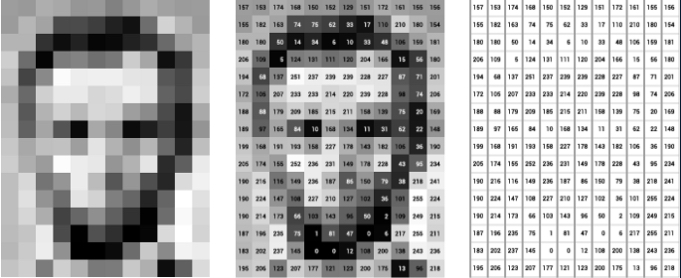 

To analyze the signal, an Engineer must <a href="https://daytodayfourier.com/waves">think in waves</a>.  So how does an engineer convert her matrix signal to a wave?  First, it helps to visualize a 2D image as a 3D landscape of undulating waves. So let's <a href="https://plus.maths.org/content/fourier-transforms-images">use the 2D image of PLUS editors</a> turned on their side to show you what we mean below.  Their skin is a lighter area in the image so it leaps up into the landscape at the bottom, making a wave.

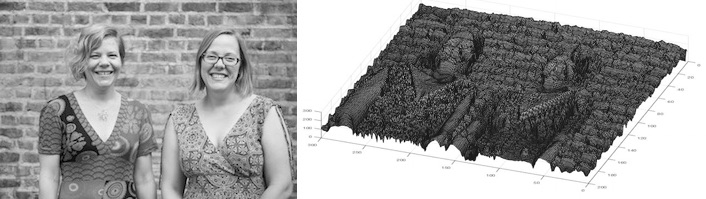

Viewed in this third dimensions, the editors'pictures kind of resembles a contorted packing paper, which is what the product of two sine waves looks like in space sin[x] and sin[y] below.

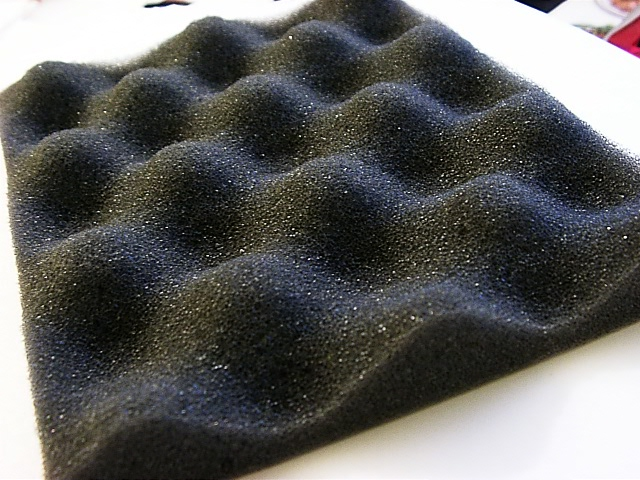

From all sides of the packing paper, we see the sine wave in two dimensions.  That side sine wave has frequency, the speed at which it is traveling around the circle, and phase, an address that describes its location on the circle. 

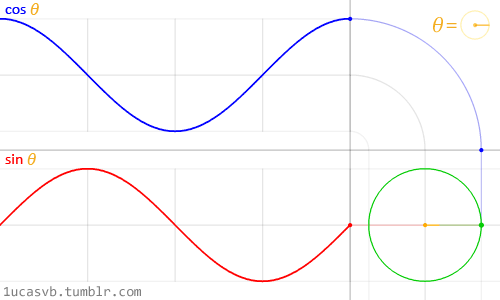

A full two-dimensional Fourier transform performs a 1-D transform on every scan-line or pixel row of the image, and another 1-D transform on every column of pixels of the image, producing a 2-D Fourier transform of the same size as the original image.  Every row of pixels is a wave that stores information about frequency, phase, and magnitude.  

Now in the case of our image of the two women above, the side of the image is not a single, perfect sine wave.  It is instead an addition of sine and cosine waves like what we would see below.  Fourier allows us to identify and separate out the frequencies that contribute to the waves that make up an image.

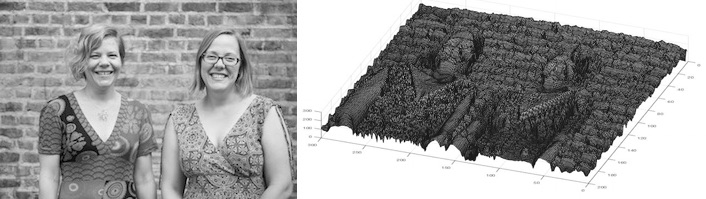

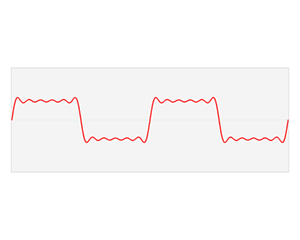

Today we are going to do something a little different that will just show you the spectrum of an image.  In this first moduele, we won't be taking the Fourier transform of anything, just observing how pixel change might be seen as a wave with frequency.  We'll be dealing with a color image first.  A typical color image has 5-20 MILLION pixels!  Let's look closer! 

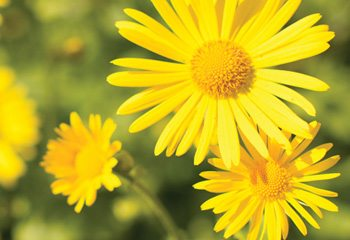

And closer still . . .

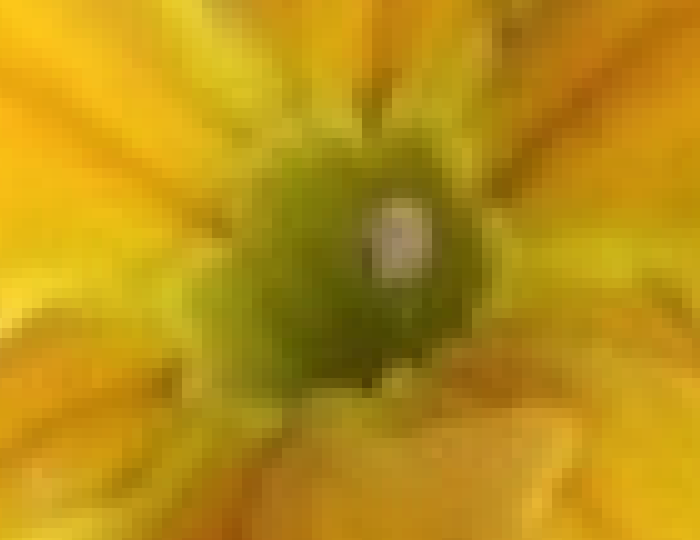

Pixels are organized as a x/y grid
x=0, y=0 "origin" upper left corner - aka (0, 0)
X grows going to the right
Y grows going down
Just like typesetting a page of text
x=0, y=0 "origin" at upper left - (0, 0)
x=1, y=0 neighbor to the right of origin - (1, 0)
x=0, y=1 neighbor below the origin - (0, 1)

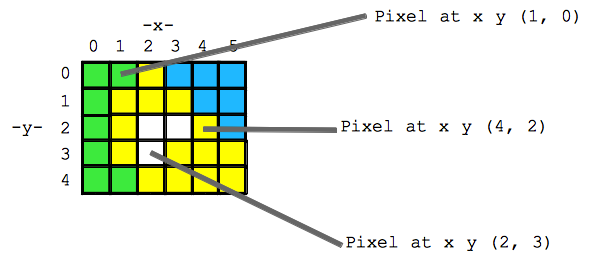

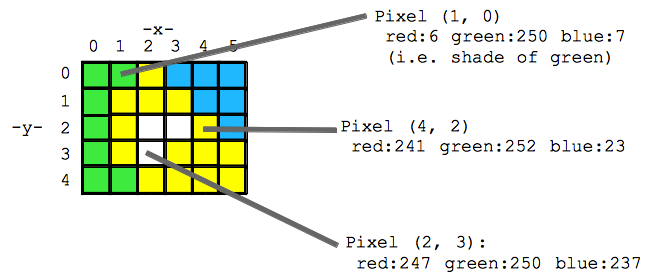

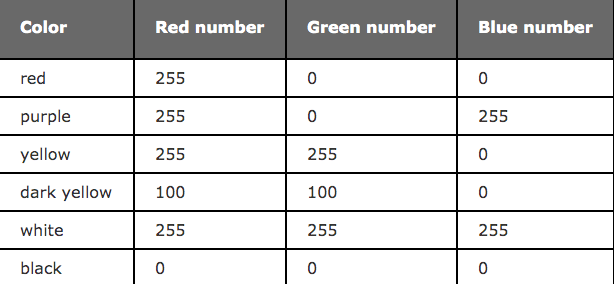

You'll notice that these numbers represent the SIGNAL in our SYSTEM.  They are REAL, they are POSITIVE! 

As a first step, you might want to check to see which version of Python you're using.

In [1]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'

Next, we need to import some libraries to work with our image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline

You can use OS operators in Jupyter, so you can check for an image in your system using the code '! ls'.  You can choose whatever image you want from the web. I love the American Poet Amanda Gorman, so I chose a Wikipedia image from her recitation of "The Hill We Climb."

In [3]:
! ls

1024px-210120-D-WD757-2466_%2850861321057%29.jpg
Applications
ComputerVision.ipynb
Desktop
Documents
Downloads
Library
Movies
Music
Pictures
Public
Untitled.ipynb


Great! Now use the operator curl -O followed by the address of whatever image you like on the web. Here's where you can have some fun picking out an image you like and replacing the url below.  

In [4]:
! curl -O https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/210120-D-WD757-2466_%2850861321057%29.jpg/1024px-210120-D-WD757-2466_%2850861321057%29.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72149  100 72149    0     0   123k      0 --:--:-- --:--:-- --:--:--  123k


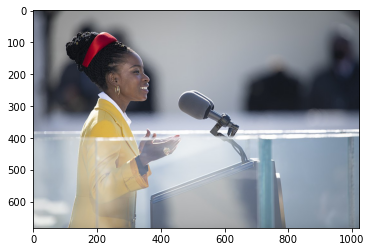

In [5]:
img = plt.imread('1024px-210120-D-WD757-2466_%2850861321057%29.jpg')
plt.imshow(img)

In [6]:
img.shape

(683, 1024, 3)

(array([ 55023., 164830.,  97488., 114079., 168882., 327856., 494150.,
        418929., 175160.,  81779.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

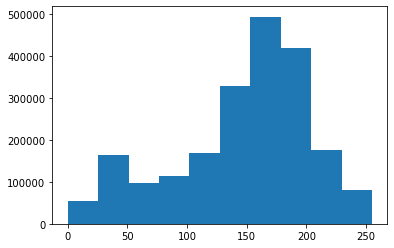

In [7]:
plt.hist(img.ravel())

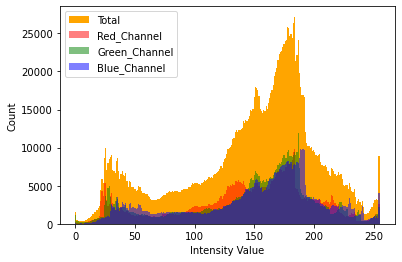

In [9]:

_ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()